In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
try:
    __IPYTHON__
    USING_IPYTHON = True
except NameError:
    USING_IPYTHON = False

In [8]:
from delphin.web import client

from delphin import ace
from delphin import scope
from delphin import dmrs,eds

from delphin.codecs import dmrsjson,dmrspenman
from delphin.codecs import edsjson


import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
from pygraphviz import AGraph

import sys
from pprint import pprint
from IPython.display import Image
import json
import random

from src.dg_util import Delphin_DiGraphs

import sacrebleu





In [ ]:
erg_path = "./erg/erg-1214-osx-0.9.30.dat"


In [9]:

print (sys.path)

['/Users/hei/Documents/mphil/semantic_parsing/delphin_test', '/Users/hei/anaconda3/envs/mphil1/lib/python37.zip', '/Users/hei/anaconda3/envs/mphil1/lib/python3.7', '/Users/hei/anaconda3/envs/mphil1/lib/python3.7/lib-dynload', '', '/Users/hei/anaconda3/envs/mphil1/lib/python3.7/site-packages', '/Users/hei/anaconda3/envs/mphil1/lib/python3.7/site-packages/IPython/extensions', '/Users/hei/.ipython']


In [83]:
#corrects
# text = 'The complex houses married and single soldiers and their families'
# text = 'The doctor charged the patient was lying.'
# text = 'The horse raced past the barn fell.'
# text = 'I convinced her children are noisy.'
# text = 'The man who hunts ducks out on weekends.'
#fails
# text = 'The old man the boat'
# text = 'We painted the wall with cracks.' #structural amb
# text = 'The prime number few.' #zero parse
#test
# text = 'Every dog chases some white cat'
# text = "What did you bring that book that I don't want to be read to out of up for?"
# text = "The new chef whose soup accidentally spilled quit and left."
# text = "Trump sought to use the powers of his office to coerce Ukraine to investigate a political rival, and officials acted to conceal evidence of the president’s actions, a newly released complaint alleges."
# text = "President Donald Trump sought to use the powers."
# text = "John loves Mary, Mary loves Peter and I love you."
# text = "Ryan’s description of himself: a genius."
# text = "Somebody denies there are barriers"
# text = "Our architecture couples the recently proposed Gated Graph Neural Networks with an input transformation that allows nodes and edges to have their own hidden representations."
# text = "The boy wants to ride the roller bicycle."
#text = "Peter was hit by a car so hardly that he cannot move."
# text = "For such cases, machine learning techniques emulate human linguistics and learn from training examples to predict future events."
# text = "But by a year later, as Linux became widely visible, it was clear that something different and much healthier was going on there."
# text = "The meteorologist says it probably won't rain."
# text = "Be sure to include a Florence wine-tasting experience when visiting Italy."
#text = "Any trip to Italy should include a visit to Florence to sample their exquisite wines."
text = "We ought to but probably won't visit Paris and Italy."
#text = "I will try and find apple and orange."
text = "Meanwhile, a number of top sales producers from Integrated Resources Equity will meet this afternoon in Chicago to discuss their options."
# text = "Aaron, the dog, ran." #appos
# text = "The mountain is snow-covered" #compound
# text = "If the dog were angry, it would bark." #conditional
# text = "Abrams arrived, the dog barked." #conjunction
# text = "I ran, fell and got up." #conjunction
text = "He told us to be good." #ACE can't generate from this?!
# text = "Let's Chase Aaron!" #Imperatives (with overt subject)
# text = "Let us Chase Aaron!" #Imperatives (with overt subject, full form)
# text = "Chase Aaron!" #Imperatives (without overt subject)
# text = "Don’t chase Aaron!" #Imperatives
# text = "A month later, he ran" #Implicit Locatives
# text = "He ran a month later" #Implicit Locatives (test order)
# text = "Money to buy the dog arrived." #(Instrumental Relatives)



In [84]:
ace_results = ace.parse(erg_path,text)
ace_results['readings']

7

In [97]:
result_idx = 0

In [98]:
ace_mrs_str = ace_results.result(result_idx)['mrs']
ace_mrs = ace_results.result(result_idx).mrs()

ace_erg_derivation = ace_results.result(result_idx).derivation()

ace_syn_tree = ace_results.result(result_idx).tree()

ace_dmrs = dmrs.from_mrs(ace_mrs)
ace_dmrsjson = json.loads(dmrsjson.encode(ace_dmrs, indent=True))

ace_eds = eds.from_mrs(ace_mrs)
ace_edsjson = json.loads(edsjson.encode(ace_eds, indent=True))

In [99]:
for idx in range(ace_results['readings']):
    pprint (ace_results.result(idx).mrs().scopal_arguments())

{'e15': [],
 'e2': [('ARG3', 'qeq', 'h14')],
 'q3': [('RSTR', 'qeq', 'h4')],
 'q8': [('RSTR', 'qeq', 'h10')],
 'x3': [],
 'x8': []}
{'e15': [],
 'e2': [('ARG3', 'qeq', 'h14')],
 'q16': [('RSTR', 'qeq', 'h20')],
 'q3': [('RSTR', 'qeq', 'h4')],
 'q8': [('RSTR', 'qeq', 'h10')],
 'x16': [],
 'x3': [],
 'x8': []}
{'e14': [('ARG1', 'qeq', 'h8'), ('ARG2', 'qeq', 'h17')],
 'e18': [],
 'e2': [],
 'q3': [('RSTR', 'qeq', 'h4')],
 'q9': [('RSTR', 'qeq', 'h10')],
 'x3': [],
 'x9': []}
{'e14': [('ARG1', 'qeq', 'h8'), ('ARG2', 'qeq', 'h17')],
 'e18': [],
 'e2': [],
 'q3': [('RSTR', 'qeq', 'h4')],
 'q9': [('RSTR', 'qeq', 'h10')],
 'x3': [],
 'x9': []}
{'e16': [],
 'e17': [('ARG1', 'qeq', 'h8'), ('ARG2', 'qeq', 'h20')],
 'e2': [('ARG3', 'qeq', 'h15')],
 'e21': [],
 'q3': [('RSTR', 'qeq', 'h4')],
 'q9': [('RSTR', 'qeq', 'h11')],
 'x3': [],
 'x9': []}
{'e14': [('ARG1', 'qeq', 'h8'), ('ARG2', 'qeq', 'h17')],
 'e18': [],
 'e2': [],
 'q19': [('RSTR', 'qeq', 'h23')],
 'q3': [('RSTR', 'qeq', 'h4')],
 'q9': [(

In [100]:
descendants = scope.descendants(ace_results.result(0).mrs())
for id, ds in descendants.items():
    print(ace_results.result(0).mrs()[id].predicate, [d.predicate for d in ds])


pron []
pronoun_q ['pron']
_tell_v_1 ['_good_a_at-for-of']
_good_a_at-for-of []
pron []
pronoun_q ['pron']


## Init Delphin_DiGraphs Object

In [101]:
delphin_digraphs = Delphin_DiGraphs(text)

## Derivation/CFG/DMRS/EDS to DiGraph

In [102]:
delphin_digraphs.init_erg_deriv(ace_erg_derivation)
delphin_digraphs.init_syn_tree(ace_syn_tree)
#pprint (ace_dmrsjson)
delphin_digraphs.init_dmrsjson(ace_dmrsjson)
delphin_digraphs.init_edsjson(ace_edsjson)

## Plotting

He told us to be good.


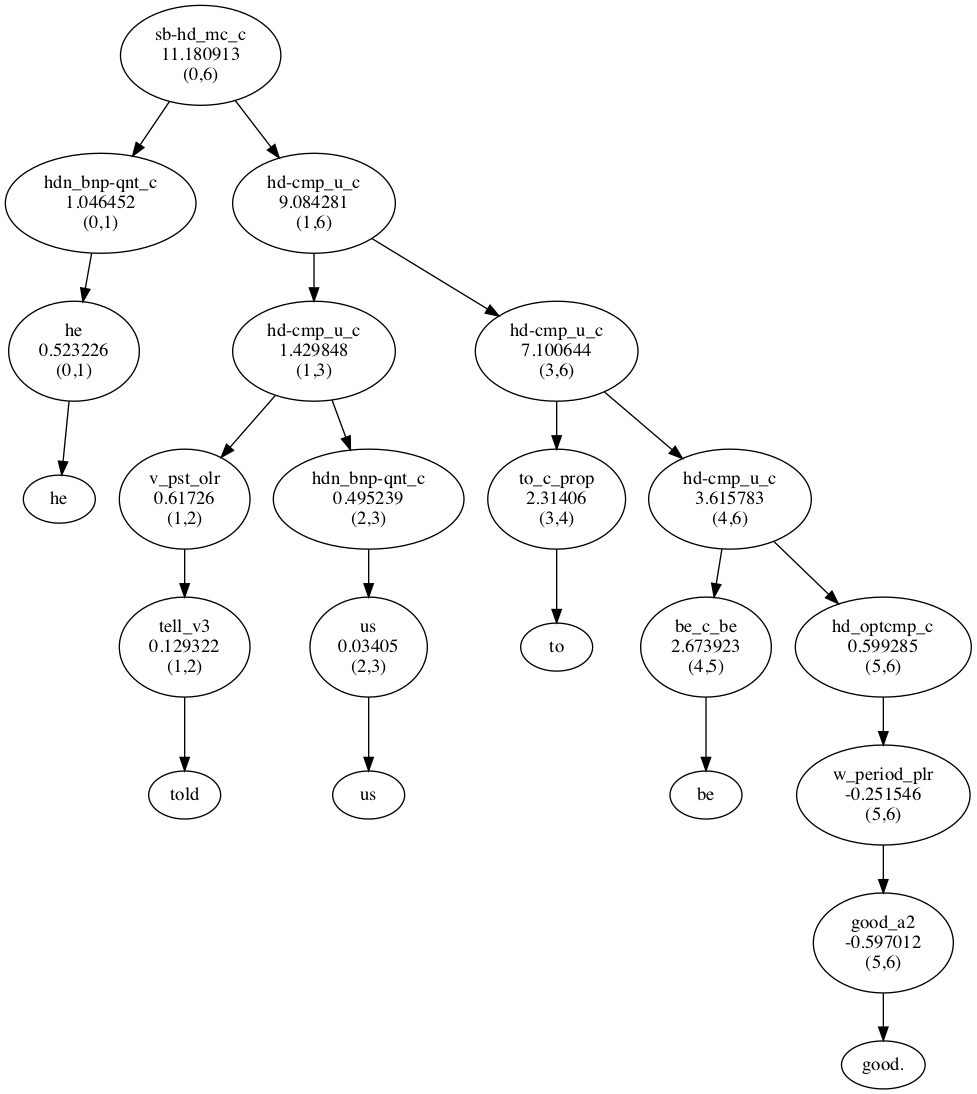

In [103]:
save_path = "./figures/tmp_deriv_dg_fig2.png"
ag = to_agraph(delphin_digraphs.erg_derivation_dg)
ag.layout('dot')
ag.draw(save_path)
print (delphin_digraphs.text)
Image(filename = save_path) 

He told us to be good.


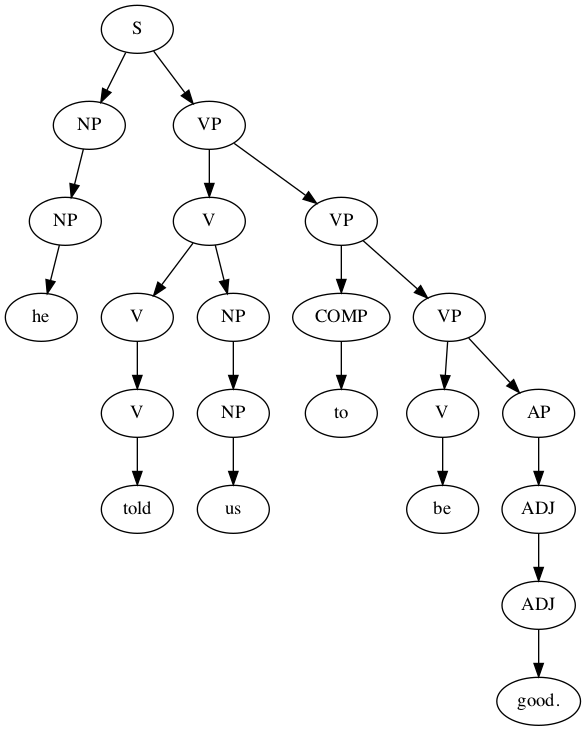

In [104]:
save_path = "./figures/tmp_syn_dg_fig2.png"
ag = to_agraph(delphin_digraphs.syn_tree_dg)
ag.layout('dot')
ag.draw(save_path)
print (delphin_digraphs.text)
Image(filename = save_path) 

In [105]:
save_path = "./figures/tmp_dmrs_dg_fig2.png"
ag = to_agraph(delphin_digraphs.dmrs_dg)
ag.draw(save_path, prog='dot')
print (delphin_digraphs.text)
Image(url = save_path) 

He told us to be good.


In [106]:
save_path = "./figures/tmp_dmrs_dg_fig3.png"
ag = to_agraph(delphin_digraphs.dmrs_dg)
#print (ag)
#ag.layout('dot')
#print (ag.draw)
print (ace_dmrsjson['index'])
seq_ag = Delphin_DiGraphs.to_seq_ag(ag, top_node_id = ace_dmrsjson['index'], text = delphin_digraphs.text ,simplified=True)
seq_ag.graph_attr['splines'] = 'polyline'
#print (seq_ag)
seq_ag.draw(save_path, prog='neato', args='-n2')
print (delphin_digraphs.text)
Image(url = save_path) 

10002
264
66
264
66
generator raised StopIteration
He told us to be good.


<bound method AGraph.draw of <AGraph <Swig Object of type 'Agraph_t *' at 0x113b4f330>>>
He told us to be good.


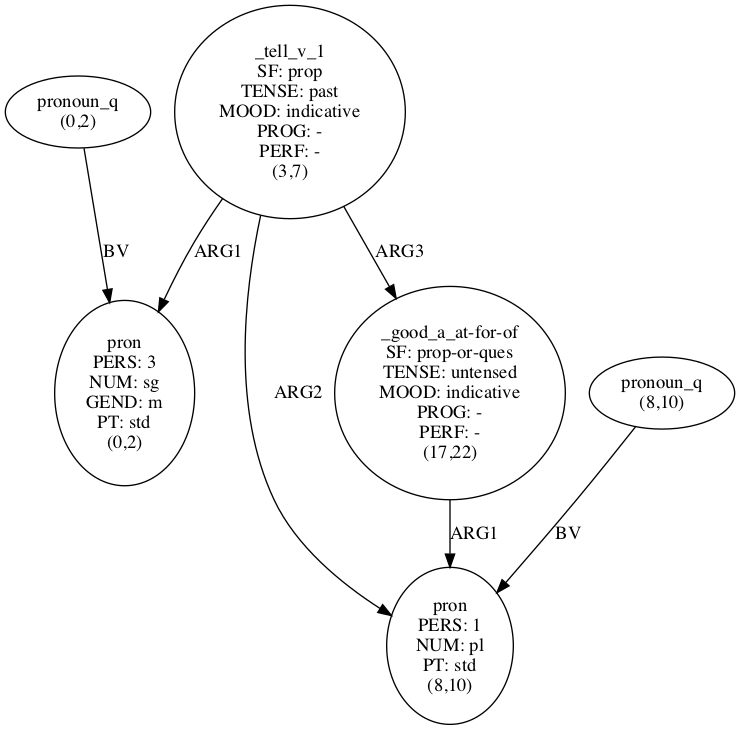

In [107]:
save_path = "./figures/tmp_eds_dg_fig2.png"
ag = to_agraph(delphin_digraphs.eds_dg)
ag.layout('dot')
print (ag.draw)
ag.draw(save_path)
print (delphin_digraphs.text)
Image(filename = save_path) 

## Generate sentence from MRS

In [108]:
m_str = '''
[ LTOP: h0
RELS: < [ "_rain_v_1_rel" LBL: h1 ARG0: e2 [ e TENSE: pres ] ] >
HCONS: < h0 qeq h1 > ]'''
m_str = '''
[ LTOP: h0 INDEX: e2 [ e SF: prop TENSE: pres MOOD: indicative PROG: 
        - PERF: - ] RELS: < [ _every_q<0:5> LBL: h4 ARG0: x3 [ x PERS: 3 NUM: 
        sg IND: + ] RSTR: h5 BODY: h6 ]  [ _dog_n_1<6:9> LBL: h7 ARG0: x3 ]  
        [ _chase_v_1<10:16> LBL: h1 ARG0: e2 ARG1: x3 ARG2: x8 [ x PERS: 3 
        NUM: sg IND: + ] ]  [ _some_q_indiv<17:21> LBL: h9 ARG0: x8 RSTR: h10 
        BODY: h11 ]  [ _white_a_1<22:27> LBL: h12 ARG0: e13 [ e SF: prop 
        TENSE: untensed MOOD: indicative PROG: - PERF: - ] ARG1: x8 ]  [ 
        _cat_n_1<28:31> LBL: h12 ARG0: x8 ] > HCONS: < h0 qeq h1 h5 qeq h7 
        h10 qeq h12 > ]
'''
m_str = ace_mrs_str
response = ace.generate(erg_path, m_str)

print ('responded!')
print (response['readings'])

    #pass
#m_str

responded!
0


In [109]:
#print (response)
ref_t = [[delphin_digraphs.text]]

for idx in range(0,response['readings']):
    pred_t = [response.result(idx)['surface']]
    bleu_score = sacrebleu.corpus_bleu(pred_t, ref_t).score
    print (idx, pred_t[0], bleu_score)
    if idx > 100:
        break

In [70]:
ref_t = [[delphin_digraphs.text]]
pred_t = ['But by a year later, it was clear that something different and much healthier was going on there, as Linux became widely visible.']
bleu_score = sacrebleu.corpus_bleu(pred_t, ref_t).score
print (bleu_score)

86.76247188209207


## Paraphrase Test

In [27]:
#paraphrase tests
text_list = [
    "Be sure to include a Florence wine-tasting experience when visiting Italy.",
    "Any trip to Italy should include a visit to Florence to sample their exquisite wines."
]


In [28]:
ace_results_list = [ace.parse(erg_path,text_list[idx]) for idx in range(len(text_list))]
result_idx = 0



Be sure to include a Florence wine-tasting experience when visiting Italy.


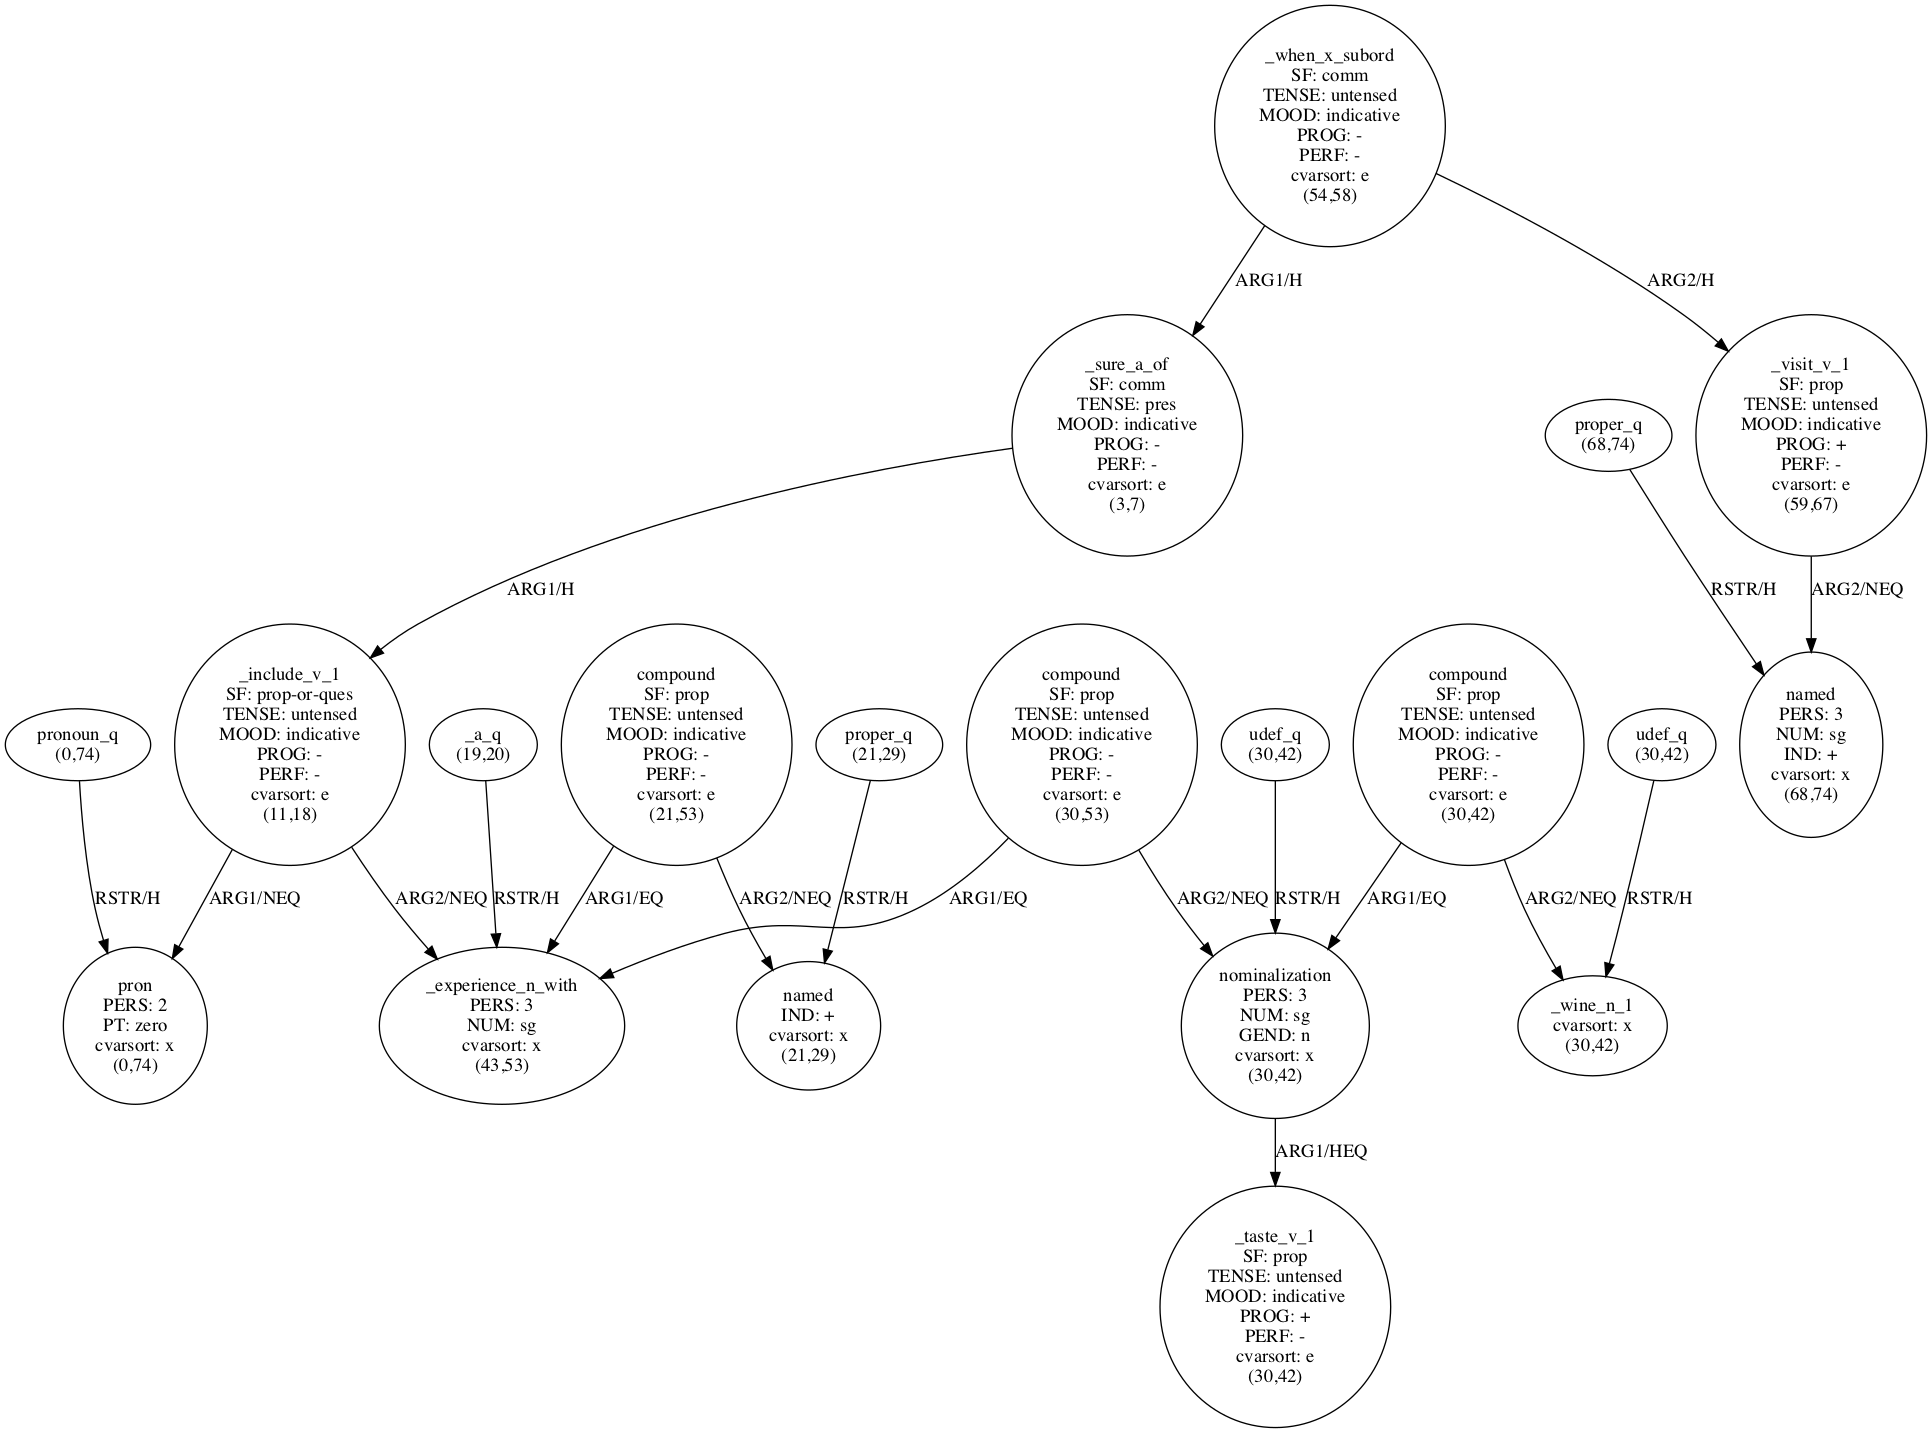



Any trip to Italy should include a visit to Florence to sample their exquisite wines.


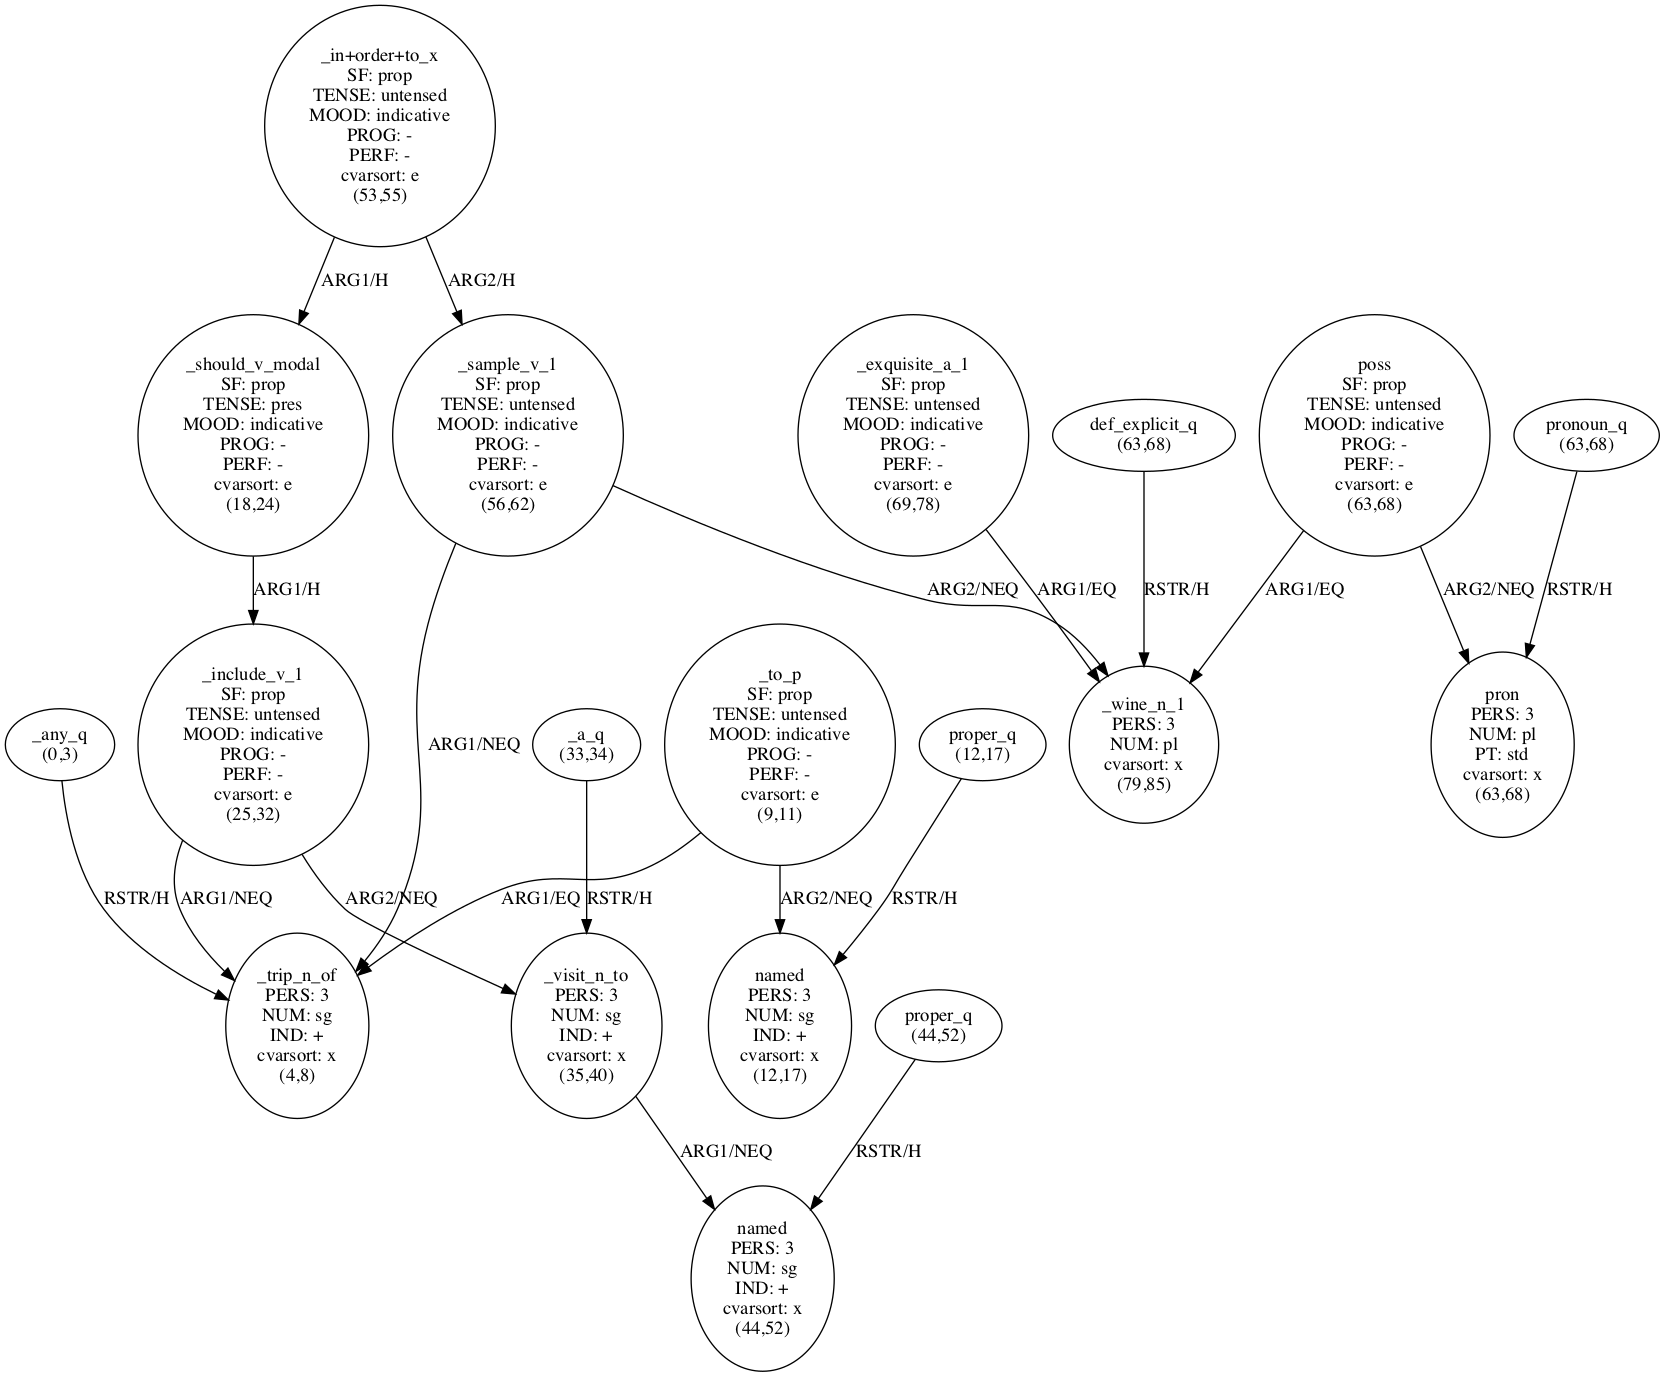

In [29]:
for idx,ace_results in enumerate(ace_results_list):
    ace_mrs_str = ace_results.result(result_idx)['mrs']
    ace_mrs = ace_results.result(result_idx).mrs()

    ace_erg_derivation = ace_results.result(result_idx).derivation()
    ace_syn_tree = ace_results.result(result_idx).tree()

    ace_dmrs = dmrs.from_mrs(ace_mrs)
    ace_dmrsjson = json.loads(dmrsjson.encode(ace_dmrs, indent=True))

    ace_eds = eds.from_mrs(ace_mrs)
    ace_edsjson = json.loads(edsjson.encode(ace_eds, indent=True))
    
    delphin_digraphs = Delphin_DiGraphs(text_list[idx])
    
    delphin_digraphs.init_erg_deriv(ace_erg_derivation)
    delphin_digraphs.init_syn_tree(ace_syn_tree)
    delphin_digraphs.init_dmrsjson(ace_dmrsjson)
    delphin_digraphs.init_edsjson(ace_edsjson)
    
    save_path = "./figures/tmp_dmrs_dg_pair1_fig.png"
    ag = to_agraph(delphin_digraphs.dmrs_dg)
    ag.layout('dot')
    ag.draw(save_path)
    print (delphin_digraphs.text)
    display(Image(filename = save_path))

In [20]:
response['readings']

0

In [ ]:
[ep.predicate for ep in m.rels]

In [ ]:
m.variables

In [ ]:
# get an EP by its ID (generally its intrinsic variable)
m['x3']

In [ ]:
m.quantification_pairs()

In [ ]:
# but if you want to be more careful you can do this...
qmap = {p.iv: q for p, q in m.quantification_pairs()}
qmap['x3']
qmap

In [ ]:
# EP arguments are available on the EPs
m['e2'].args

In [ ]:
# While HCONS are available on the MRS
[(hc.hi, hc.relation, hc.lo) for hc in m.hcons]

In [ ]:
int("13")

In [ ]:
m['e2'].args

In [ ]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt

G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)
pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()